In [10]:
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import category_encoders as ce 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
# Import Data
os.chdir("../data")
df = pd.read_csv("movies.csv", header=0,encoding = "ISO-8859-1")
df.shape
df.head(10)

(6820, 15)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


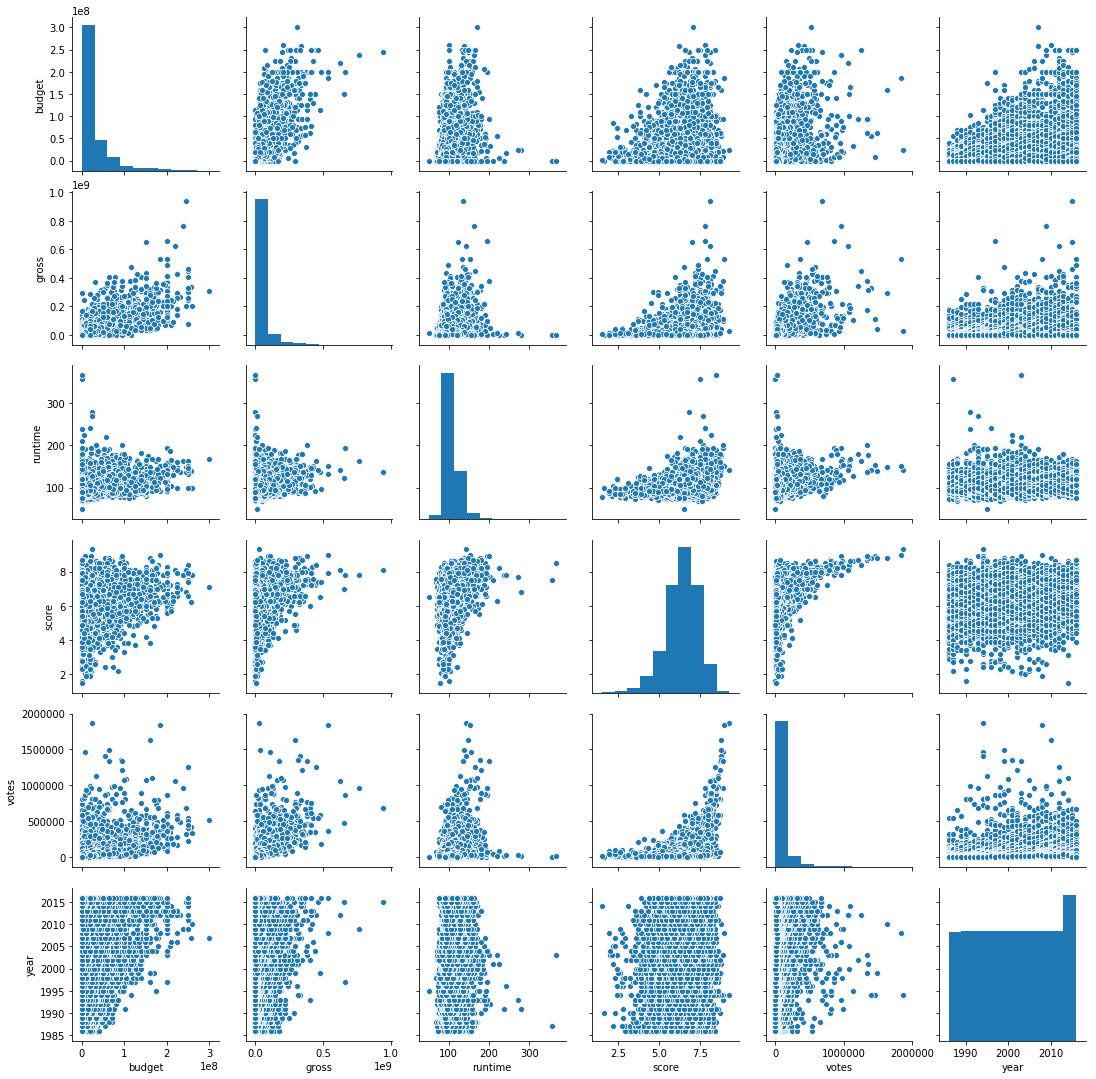

In [5]:
# Exploratory 

sns.pairplot(df)
df.corr()

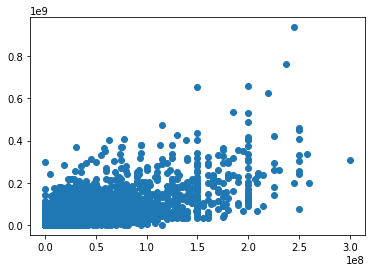

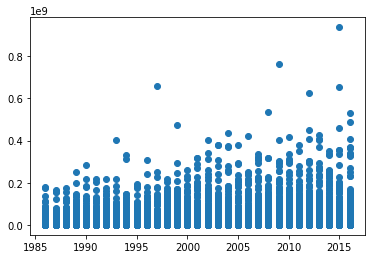

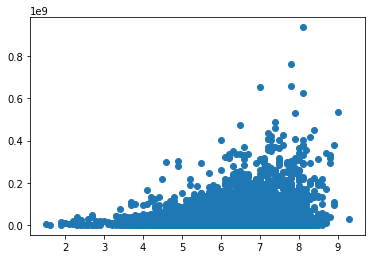

array([[1.        , 0.71219553],
       [0.71219553, 1.        ]])

array([[1.        , 0.16569256],
       [0.16569256, 1.        ]])

hi


In [6]:
# Exploratory
plt.scatter(df.budget, df.gross)
plt.show()

plt.scatter(df.year, df.gross)
plt.show()

plt.scatter(df.score, df.gross)
plt.show()

np.corrcoef(df.gross, df.budget)
np.corrcoef(df.gross, df.score)

print("hi")

In [ ]:
# Convert dates to seasonality
s = np.repeat("a",len(df.index))
for e in range(0,len(df.index)):
    var = df.released[e][5:7]
    if var == '05' or var == '06' or var =='07':
        df.released[e]='sum'
    elif var =='11' or var=='12' or var=='01' :
        df.released[e] = 'win'
    elif var =='02' or var=='03' or var=='04' :
        df.released[e] = 'spr'
    elif var =='08' or var=='09' or var=='10' :
        df.released[e] = 'fal'

C:\Users\kangyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\kangyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kangyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stu

In [ ]:
df.head(2)

In [30]:
# One-Hot Encode
x_col = df
y_col = df.gross
ce_one_hot = ce.OneHotEncoder(cols = ['company','genre','rating','country','year'])
df_oh = ce_one_hot.fit_transform(x_col,y_col)

In [18]:
df_oh.head(4)

,budget,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,company_11,company_12,company_13,company_14,company_15,company_16,company_17,company_18,company_19,company_20,company_21,company_22,company_23,company_24,company_25,company_26,company_27,company_28,company_29,company_30,company_31,company_32,company_33,company_34,company_35,company_36,company_37,company_38,company_39,company_40,company_41,company_42,company_43,company_44,company_45,company_46,company_47,company_48,company_49,company_50,company_51,company_52,company_53,company_54,company_55,company_56,company_57,company_58,company_59,company_60,company_61,company_62,company_63,company_64,company_65,company_66,company_67,company_68,company_69,company_70,company_71,company_72,company_73,company_74,company_75,company_76,company_77,company_78,company_79,company_80,company_81,company_82,company_83,company_84,company_85,company_86,company_87,company_88,company_89,company_90,company_91,company_92,company_93,company_94,company_95,company_96,company_97,company_98,company_99,company_100,company_101,company_102,company_103,company_104,company_105,company_106,company_107,company_108,company_109,company_110,company_111,company_112,company_113,company_114,company_115,company_116,company_117,company_118,company_119,company_120,company_121,company_122,company_123,company_124,company_125,company_126,company_127,company_128,company_129,company_130,company_131,company_132,company_133,company_134,company_135,company_136,company_137,company_138,company_139,company_140,company_141,company_142,company_143,company_144,company_145,company_146,company_147,company_148,company_149,company_150,company_151,company_152,company_153,company_154,company_155,company_156,company_157,company_158,company_159,company_160,company_161,company_162,company_163,company_164,company_165,company_166,company_167,company_168,company_169,company_170,company_171,company_172,company_173,company_174,company_175,company_176,company_177,company_178,company_179,company_180,company_181,company_182,company_183,company_184,company_185,company_186,company_187,company_188,company_189,company_190,company_191,company_192,company_193,company_194,company_195,company_196,company_197,company_198,company_199,company_200,company_201,company_202,company_203,company_204,company_205,company_206,company_207,company_208,company_209,company_210,company_211,company_212,company_213,company_214,company_215,company_216,company_217,company_218,company_219,company_220,company_221,company_222,company_223,company_224,company_225,company_226,company_227,company_228,company_229,company_230,company_231,company_232,company_233,company_234,company_235,company_236,company_237,company_238,company_239,company_240,company_241,company_242,company_243,company_244,company_245,company_246,company_247,company_248,company_249,...,company_1971,company_1972,company_1973,company_1974,company_1975,company_1976,company_1977,company_1978,company_1979,company_1980,company_1981,company_1982,company_1983,company_1984,company_1985,company_1986,company_1987,company_1988,company_1989,company_1990,company_1991,company_1992,company_1993,company_1994,company_1995,company_1996,company_1997,company_1998,company_1999,company_2000,company_2001,company_2002,company_2003,company_2004,company_2005,company_2006,company_2007,company_2008,company_2009,company_2010,company_2011,company_2012,company_2013,company_2014,company_2015,company_2016,company_2017,company_2018,company_2019,company_2020,company_2021,company_2022,company_2023,company_2024,company_2025,company_2026,company_2027,company_2028,company_2029,company_2030,company_2031,company_2032,company_2033,company_2034,company_2035,company_2036,company_2037,company_2038,company_2039,company_2040,company_2041,company_2042,company_2043,company_2044,company_2045,company_2046,company_2047,company_2048,company_2049,company_2050,company_2051,company_2052,company_2053,company_2054,company_2055,com

In [15]:
# Linear Model without encoding 

x = df[['budget','runtime','score','votes','year']]
y = df['gross']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2374.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        16:32:30   Log-Likelihood:            -1.2817e+05
No. Observations:                6820   AIC:                         2.564e+05
Df Residuals:                    6814   BIC:                         2.564e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.322e+08      1e+08      7.312      0.000    5.36e+08    9.29e+08
budget         0.8286      0.014     58.251      0.000       0.801       0.856
runtime    -1.515e+05   2.68e+04     -5.654      0.000   -2.04e+05    -9.9e+04
score       5.468e+04   5.03e+05      0.109      0.913   -9.31e+05    1.04e+06
votes        189.0524      4.202     44.988      0.000     180.815     197.290
year       -3.582e+05   5.01e+04     -7.146      0.000   -4.56e+05    -2.6e+05
==============================================================================
Omnibus:                     4845.370   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           323187.707
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      36.273   Cond. No.                     1.05e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
type(x_oh_train)

numpy.ndarray

In [33]:
# Linear Model with encoding
x_oh = df_oh.drop(['director','name','writer','star'],axis=1)
y_oh = df_oh.gross

x_oh_train, x_oh_test, y_oh_train, y_oh_test = train_test_split(x_oh,y_oh,test_size=0.3,random_state=7)

# x_oh = sm.add_constant(x_oh)
model_oh = sm.OLS(y_oh_train,x_oh_train).fit()
model_oh.summary()



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [20]:

x_test = sm.add_constant(x_test)
pred_lm = model.predict(x_test)
print(pred_lm)


3530    2.944938e+08
6521    7.242853e+07
4396    9.132953e+06
2551    7.221699e+05
5523    5.739137e+07
4725    1.609870e+07
3249    1.358679e+07
5160    3.029966e+07
194     7.517798e+06
2497    3.103220e+07
756     6.542613e+06
5443    1.109082e+07
2722    4.733231e+07
4385    6.852593e+06
706     1.534765e+07
1391    1.461103e+07
2926    5.122545e+07
3538    4.578501e+07
2195    4.379495e+06
131     6.803740e+06
1634    1.012910e+07
4908    1.530539e+08
5905   -3.604333e+06
4821    1.059976e+07
2906    9.732679e+07
4668    2.034032e+06
6753    2.922163e+07
5675    2.997211e+07
571     1.133289e+07
1034    1.136880e+06
            ...     
3166    8.180996e+06
4290    3.331710e+07
2699    2.813411e+07
3225    2.414924e+06
3110    4.862018e+07
5141    3.442886e+07
4174    7.061557e+06
3701    2.297633e+07
2697    6.072838e+07
4463    1.022907e+08
5953    2.004504e+07
2731    7.695634e+07
427     5.793655e+06
6808    2.669581e+06
6814    1.440056e+07
2000    2.924074e+07
3594    5.883